<a href="https://colab.research.google.com/github/chupvl/gcolab/blob/main/2023_05_24_graph_viz_with_networkx.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph representation of the chemical compound: rdkit + networkx


2023-05-25

Vladimir Chupakhin

A reminder for myself on how to work with NetworkX and graph representation of the chemical compounds.

## Libs

In [1]:
!pip install rdkit -q

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.7/29.7 MB 25.9 MB/s eta 0:00:00


In [2]:
import networkx as nx
from rdkit import Chem
from rdkit.Chem import Draw

## Visualization

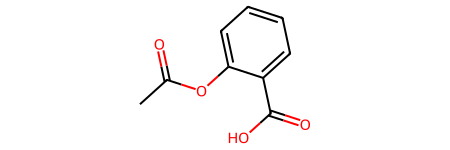

In [3]:
# Create a RDKit molecule object for aspirin
aspirin_smiles = 'CC(=O)OC1=CC=CC=C1C(=O)O'
aspirin_mol = Chem.MolFromSmiles(aspirin_smiles)
aspirin_mol

In [10]:
# Generate an RDKit graph from the molecule
aspirin_graph = nx.Graph()

atom_labels = {}
atom_colors = {}

for atom in aspirin_mol.GetAtoms():
    atom_idx = atom.GetIdx()
    atom_symbol = atom.GetSymbol()
    atom_type = atom.GetAtomicNum()
    aspirin_graph.add_node(atom_idx, symbol=atom_symbol)
    atom_labels[atom_idx] = atom_symbol
    atom_colors[atom_idx] = atom_type

for bond in aspirin_mol.GetBonds():
    atom1_idx = bond.GetBeginAtomIdx()
    atom2_idx = bond.GetEndAtomIdx()
    bond_type = bond.GetBondTypeAsDouble()
    aspirin_graph.add_edge(atom1_idx, atom2_idx, bond_type=bond_type)

In [11]:
# Print the graph representation - nodes
for i in aspirin_graph.nodes(data=True):
  print(i)

(0, {'symbol': 'C'})
(1, {'symbol': 'C'})
(2, {'symbol': 'O'})
(3, {'symbol': 'O'})
(4, {'symbol': 'C'})
(5, {'symbol': 'C'})
(6, {'symbol': 'C'})
(7, {'symbol': 'C'})
(8, {'symbol': 'C'})
(9, {'symbol': 'C'})
(10, {'symbol': 'C'})
(11, {'symbol': 'O'})
(12, {'symbol': 'O'})


In [12]:
# Print the graph representation - edges
for i in aspirin_graph.edges(data=True):
  print(i)

(0, 1, {'bond_type': 1.0})
(1, 2, {'bond_type': 2.0})
(1, 3, {'bond_type': 1.0})
(3, 4, {'bond_type': 1.0})
(4, 5, {'bond_type': 1.5})
(4, 9, {'bond_type': 1.5})
(5, 6, {'bond_type': 1.5})
(6, 7, {'bond_type': 1.5})
(7, 8, {'bond_type': 1.5})
(8, 9, {'bond_type': 1.5})
(9, 10, {'bond_type': 1.0})
(10, 11, {'bond_type': 2.0})
(10, 12, {'bond_type': 1.0})


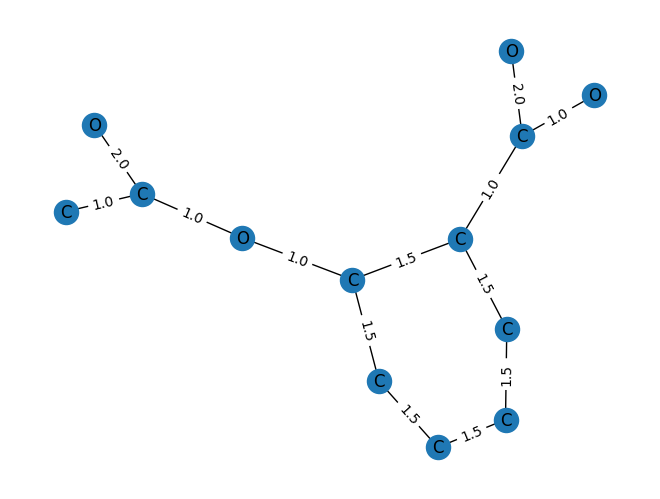

In [13]:
# Visualize the graph with labels
labels = nx.get_node_attributes(aspirin_graph, 'symbol')
edge_labels = nx.get_edge_attributes(aspirin_graph, 'bond_type')
pos = nx.spring_layout(aspirin_graph)
nx.draw(aspirin_graph, pos, with_labels=True, labels=labels)
nx.draw_networkx_edge_labels(aspirin_graph, pos, edge_labels=edge_labels)

# Show it
import matplotlib.pyplot as plt
plt.show()
# yuk, ugly...

## Let's paint it...

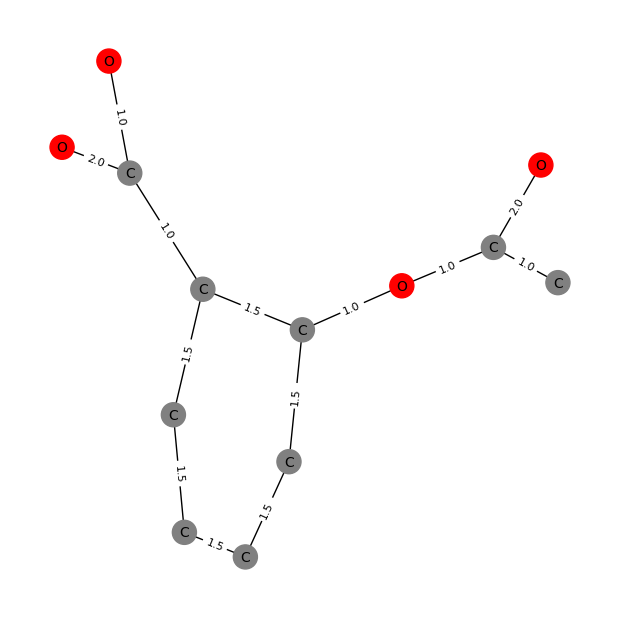

In [14]:
# Set up node colors based on user-specified list
user_atom_colors = {6: 'gray', 8: 'red'}  # User-specified colors for carbon (6) and oxygen (8)
node_colors = [user_atom_colors.get(atom_colors[node]) for node in aspirin_graph.nodes()]

# Draw the graph with labels and colors
plt.figure(figsize=(6, 6))
pos = nx.spring_layout(aspirin_graph) # seed=42 - to keep graph stable
nx.draw(aspirin_graph, pos, node_color=node_colors, with_labels=True, labels=atom_labels, font_size=10)
edge_labels = nx.get_edge_attributes(aspirin_graph, 'bond_type')
nx.draw_networkx_edge_labels(aspirin_graph, pos, edge_labels=edge_labels, font_size=8)
plt.axis('off')
plt.show()